## Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file. 

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!


### Grading

This homework is due **Feb. 21, 2019 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

## Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file. 

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!


### Grading

This homework is due **Oct. 16, 2018 by 4:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

In [3]:
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [4]:
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
train_cols = train.columns
test_cols = test.columns
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Cleaning the data

### We can first check for any duplicate ID's in the data

In [668]:
idsUqe = len(set(train.Id))
idsTotal = train.shape[0]
idsDup = idsTotal - idsUqe
print(str(idsDup))

0


In [669]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [670]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We want to deal with categorical and numerical variables differently. So we first start by seperating them into two different groups that we can deal with

In [671]:
def get_feature_groups(df):
    num_features = df.select_dtypes(include=['int64','float64']).columns
    cat_features = train.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)
num_features, cat_features = get_feature_groups(train)

In [672]:
len(num_features)

38

### Now we check and deal with null values

In [673]:
nulls = []
for i in range(len(num_features)):
    if train[num_features[i]].isnull().any() == True:
        nulls.append(num_features[i])
train.loc[:,nulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
LotFrontage    1201 non-null float64
MasVnrArea     1452 non-null float64
GarageYrBlt    1379 non-null float64
dtypes: float64(3)
memory usage: 34.3 KB


In [674]:
nulls = []
for i in range(len(cat_features)):
    if train[cat_features[i]].isnull().any() == True:
        nulls.append(cat_features[i])
train.loc[:,nulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
Alley           91 non-null object
MasVnrType      1452 non-null object
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
dtypes: object(16)
memory usage: 182.6+ KB


### Looks like we have a couple of columns with many null values, but mostly columns with none, which is good. Lets first replace the categorical columns with "None" where it makes sense

In [574]:
train.loc[train['Alley'].isnull(),'Alley'] = "None"
train.loc[train['MasVnrType'].isnull(),'MasVnrType'] = "None"
train.loc[train['BsmtQual'].isnull(),'BsmtQual'] = "None"
train.loc[train['BsmtCond'].isnull(),'BsmtCond'] = "None"
train.loc[train['BsmtExposure'].isnull(),'BsmtExposure'] = "None"
train.loc[train['BsmtFinType1'].isnull(),'BsmtFinType1'] = "None"
train.loc[train['BsmtFinType2'].isnull(),'BsmtFinType2'] = "None"
train.loc[train['Electrical'].isnull(),'Electrical'] = "SBrkr"
train.loc[train['FireplaceQu'].isnull(),'FireplaceQu'] = "None"
train.loc[train['GarageType'].isnull(),'GarageType'] = "None"
train.loc[train['GarageFinish'].isnull(),'GarageFinish'] = "None"
train.loc[train['GarageQual'].isnull(),'GarageQual'] = "None"
train.loc[train['GarageCond'].isnull(),'GarageCond'] = "None"
train.loc[train['PoolQC'].isnull(),'PoolQC'] = "None"
train.loc[train['Fence'].isnull(),'Fence'] = "None"
train.loc[train['MiscFeature'].isnull(),'MiscFeature'] = "None"

### Now we will replace the non-categorical variables with either their mean or 0, whatever makes more sense with the variable

In [735]:
train.loc[train['LotFrontage'].isnull(),'LotFrontage'] = train['LotFrontage'].mean()
train.loc[train['MasVnrArea'].isnull(),'MasVnrArea'] = 0
train.loc[train['GarageYrBlt'].isnull(),'GarageYrBlt'] = train['GarageYrBlt'].mean()

test.loc[test['LotFrontage'].isnull(),'LotFrontage'] = test['LotFrontage'].mean()
test.loc[test['MasVnrArea'].isnull(),'MasVnrArea'] = 0
test.loc[test['GarageYrBlt'].isnull(),'GarageYrBlt'] = test['GarageYrBlt'].mean()

In [576]:
nulls = []
for i in range(len(num_features)):
    if train[num_features[i]].isnull().any() == True:
        nulls.append(num_features[i])
train.loc[:,nulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Empty DataFrame

In [577]:
nulls = []
for i in range(len(cat_features)):
    if train[cat_features[i]].isnull().any() == True:
        nulls.append(cat_features[i])
train.loc[:,nulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Empty DataFrame

### We can do the same on the test data as well

In [578]:
nulls = []
for i in range(len(test_cols)):
    if test[test_cols[i]].isnull().any() == True:
        nulls.append(test_cols[i])
test.loc[:,nulls].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 33 columns):
MSZoning        1455 non-null object
LotFrontage     1232 non-null float64
Alley           107 non-null object
Utilities       1457 non-null object
Exterior1st     1458 non-null object
Exterior2nd     1458 non-null object
MasVnrType      1443 non-null object
MasVnrArea      1444 non-null float64
BsmtQual        1415 non-null object
BsmtCond        1414 non-null object
BsmtExposure    1415 non-null object
BsmtFinType1    1417 non-null object
BsmtFinSF1      1458 non-null float64
BsmtFinType2    1417 non-null object
BsmtFinSF2      1458 non-null float64
BsmtUnfSF       1458 non-null float64
TotalBsmtSF     1458 non-null float64
BsmtFullBath    1457 non-null float64
BsmtHalfBath    1457 non-null float64
KitchenQual     1458 non-null object
Functional      1457 non-null object
FireplaceQu     729 non-null object
GarageType      1383 non-null object
GarageYrBlt     1381 non-null float6

### There are even more null values in our test data, so we will have to clean that up, lets start with the categorical data

In [5]:
test.loc[test['Alley'].isnull(),'Alley'] = "None"
test.loc[test['MasVnrType'].isnull(),'MasVnrType'] = "None"
test.loc[test['BsmtQual'].isnull(),'BsmtQual'] = "None"
test.loc[test['BsmtCond'].isnull(),'BsmtCond'] = "None"
test.loc[test['BsmtExposure'].isnull(),'BsmtExposure'] = "None"
test.loc[test['BsmtFinType1'].isnull(),'BsmtFinType1'] = "None"
test.loc[test['BsmtFinType2'].isnull(),'BsmtFinType2'] = "None"
test.loc[test['Electrical'].isnull(),'Electrical'] = "None"
test.loc[test['FireplaceQu'].isnull(),'FireplaceQu'] = "None"
test.loc[test['GarageType'].isnull(),'GarageType'] = "None"
test.loc[test['GarageFinish'].isnull(),'GarageFinish'] = "None"
test.loc[test['GarageQual'].isnull(),'GarageQual'] = "None"
test.loc[test['GarageCond'].isnull(),'GarageCond'] = "None"
test.loc[test['PoolQC'].isnull(),'PoolQC'] = "None"
test.loc[test['Fence'].isnull(),'Fence'] = "None"
test.loc[test['MiscFeature'].isnull(),'MiscFeature'] = "None"
test.loc[test['MSZoning'].isnull(),'MSZoning'] = "None"
test.loc[test['Utilities'].isnull(),'Utilities'] = "None"
test.loc[test['Exterior1st'].isnull(),'Exterior1st'] = "None"
test.loc[test['Exterior2nd'].isnull(),'Exterior2nd'] = "None"
test.loc[test['KitchenQual'].isnull(),'KitchenQual'] = "None"
test.loc[test['Functional'].isnull(),'Functional'] = "None"
test.loc[test['SaleType'].isnull(),'SaleType'] = "None"

### Then we can do the non-categorical data

In [733]:
test.loc[test['LotFrontage'].isnull(),'LotFrontage'] = train['LotFrontage'].mean()
test.loc[test['MasVnrArea'].isnull(),'MasVnrArea'] = 0
test.loc[test['GarageYrBlt'].isnull(),'GarageYrBlt'] = train['GarageYrBlt'].mean()
test.loc[test['BsmtFinSF1'].isnull(),'BsmtFinSF1'] = 0
test.loc[test['BsmtFinSF2'].isnull(),'BsmtFinSF2'] = 0
test.loc[test['BsmtUnfSF'].isnull(),'BsmtUnfSF'] = 0
test.loc[test['TotalBsmtSF'].isnull(),'TotalBsmtSF'] = 0
test.loc[test['BsmtFullBath'].isnull(),'BsmtFullBath'] = 0
test.loc[test['BsmtHalfBath'].isnull(),'BsmtHalfBath'] = 0
test.loc[test['GarageCars'].isnull(),'GarageCars'] = 0
test.loc[test['GarageArea'].isnull(),'GarageArea'] = 0

In [658]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

Lets look at what variables have over 9/10ths of the data being the same number. Since these are unified throughout almost the entire model, these may not be very good indicators of sale price  

In [582]:
drop_them  = []
for i in train:
    if train[i].dtype == 'object':
        if train[i].value_counts(normalize=True, dropna= False).iloc[0] > .90:
            drop_them.append(i)
drop_them

['Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature']

In [583]:
train.drop(columns=['Id'], inplace=True)
test.drop(columns=['Id'], inplace=True) #After that we can drop the ID tag as it is not useful information

In [619]:
Id = train['Id']

## Dummy Variables

We need to create dummy variables for all of our categorical variables we found. We do the pain staking process of finding all the unique values and then replacing them with dummy variables

In [467]:
train.Alley.unique()
train.PoolQC.unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [584]:
for df in [train, test]:
    df.Alley.replace({0: 'None', 1:'Grvl', 2:'Pave'}, inplace=True)
    df.LotShape.replace({0: 'None', 1:'Reg', 2:'IR1', 3:'IR2', 4:'IR3'}, inplace=True)
    df.LandContour.replace({0: 'None', 1:'Low', 2:'HLS', 3:'Bnk', 4:'Lvl'}, inplace=True)
    df.Utilities.replace({0: 'None', 1:'ELO', 2:'NoSeWa', 3:'NoSewr', 4:'AllPub'}, inplace=True)
    df.LandSlope.replace({0: 'None', 1:'Sev', 2:'Mod', 3:'Gtl'}, inplace=True)
    df.BsmtQual.replace({0: 'None', 1:'Po', 2:'Fa', 3:'TA', 4:'Gd', 5:'Ex'}, inplace=True)
    df.BsmtCond.replace({0: 'None', 1:'Po', 2:'Fa', 3:'TA', 4:'Gd', 5:'Ex'}, inplace=True)
    df.BsmtExposure.replace({0: 'None', 1:'No', 2:'Mn', 3:'Av', 4:'Gd'}, inplace=True)
    df.BsmtFinType1.replace({0: 'None', 1:'Unf', 2:'LwQ', 3:'Rec', 4:'BLQ', 5:'ALQ', 6:'GLQ'}, inplace=True)
    df.BsmtFinType2.replace({0: 'None', 1:'Unf', 2:'LwQ', 3:'Rec', 4:'BLQ', 5:'ALQ', 6:'GLQ'}, inplace=True)
    df.FireplaceQu.replace({0: 'None', 1:'Po', 2:'Fa', 3:'TA', 4:'Gd', 5:'Ex'}, inplace=True)
    df.GarageFinish.replace({0: 'None', 1:'Unf', 2:'RFn', 3:'Fin'}, inplace=True)
    df.GarageQual.replace({0: 'None', 1:'Po', 2:'Fa', 3:'TA', 4:'Gd', 5:'Ex'}, inplace=True)
    df.GarageCond.replace({0: 'None', 1:'Po', 2:'Fa', 3:'TA', 4:'Gd', 5:'Ex'}, inplace=True)
    df.PavedDrive.replace({0: 'None', 1:'N', 2:'P', 3:'Y'}, inplace=True)
    df.PoolQC.replace({0: 'None', 2:'Fa', 3:'TA', 4:'Gd', 5:'Ex'}, inplace=True)


# Looking at our Data it looks like our Sale Prices are skewed right, which made prediction really difficult

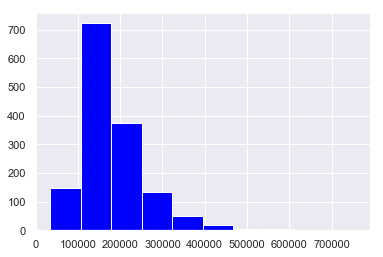

In [469]:
plt.hist(train.SalePrice, color = 'blue')
plt.show()

We can remove some of the outliers by removing all of the data that is above 3 z-scores from the mean

In [470]:
train=train[(np.abs(stats.zscore(train.SalePrice))<3)]

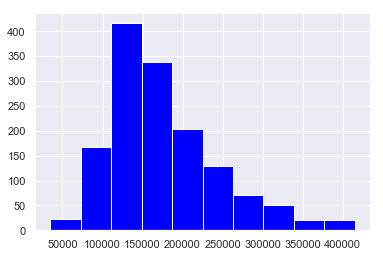

In [471]:
plt.hist(train.SalePrice, color = 'blue')
plt.show()

## Taking the Natural Log of the Data can help us normalize the data

Looks like our data is still skewed right so we can transform it

In [472]:
log_price = np.log(train['SalePrice'])

(array([  5.,   5.,  14.,  72., 173., 381., 368., 230., 132.,  58.]),
 array([10.46024211, 10.70789306, 10.95554401, 11.20319496, 11.45084591,
        11.69849686, 11.94614781, 12.19379876, 12.44144971, 12.68910066,
        12.93675161]),
 <a list of 10 Patch objects>)

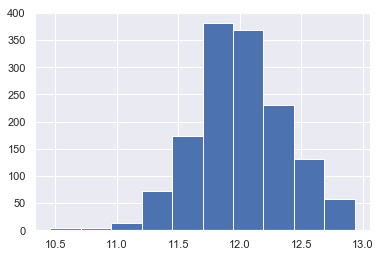

In [473]:
plt.hist(log_price)

## Visualization

A heat map does a great job at showing us what correlates best, since these will be the best predictors for our model

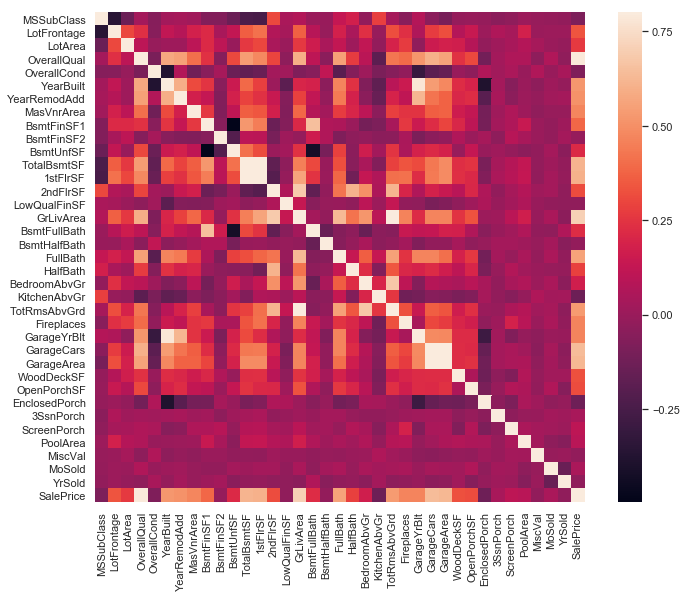

In [503]:
corr_mat = train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,vmax=.8,square=True)

What we really want is the variables that correlate with Sale Price the best, as these will be the best predictors of Sale Price for our model. Looking at the list of variables below it seems like Overall Quality, many variables about the size of the home, and the number of baths and bedrooms are the best indicators of sale price, which is what I would expect. 

In [504]:
val = corr_mat['SalePrice'].sort_values(ascending=False)
val

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

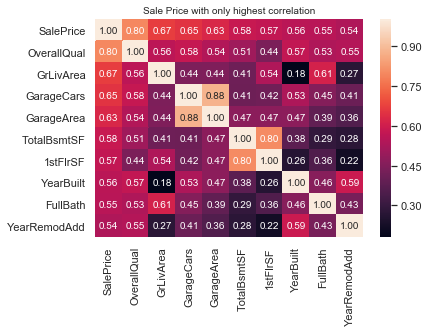

In [476]:
correlation = train.corr()
cols = correlation.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.00)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Sale Price with only highest correlation', fontsize=10)
plt.show()

In [477]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [505]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000


# Model

### Split into X and Y

In [688]:
target = train['SalePrice']
train.drop(columns='SalePrice',inplace=True)
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data = pd.get_dummies(all_data)
hcols = all_data.columns
train = all_data.loc[:(len(target)-1),hcols]
test = all_data.loc[len(target):,hcols]

In [689]:
print(len(train.columns))
print(len(test.columns))

300
300


In [697]:
x = train
y = np.log(target)
x_test = test

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

In [600]:
x.drop(columns=['Id'],inplace=True)

In [699]:
scaler = StandardScaler()
scaler.fit(x)
scaled_df = scaler.transform(x)

/Users/zacharychild/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zacharychild/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [703]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(scaled_df, y)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(y, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 451.065536330978


Our Mean Square error is extremly high! Not a good sign! This means that this model is not very reliable at all. If I were Zillow, I would not trust this model! I need to make some changes to it

### Maybe we need to Log the price

In [592]:
log_price = np.log(target)

In [593]:
z = log_price
lin_train = train.loc[:,num_features]
lin_train.drop(columns=['SalePrice'], inplace=True)
x = lin_train

/Users/zacharychild/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [654]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(scaled_df, z)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(z, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 0.1474052030021123


In [ ]:
scaler = StandardScaler()
scaler.fit(x)
scaled_df = scaler.transform(x)

Taking the Log of our model helped a ton!! It got our MSE down to a really low number! A really good sign that our model is a pretty good predictor

I want to try a gradient boost Regression

In [736]:
## GradientBoostedRegression frm Kernel online.
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
         'learning_rate': 0.1, 'loss': 'ls'}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(x, target)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [737]:
gbr_model.score(x, target)

0.9980346810071207

In [738]:
y_grad_predict =gbr_model.predict(x_test)

# Submit to Kaggle

In [740]:
my_submission = pd.DataFrame({'Id':x_test['Id'], 'SalePrice':y_grad_predict})
my_submission.to_csv('submission.csv', encoding='utf-8', index=False)

### I submitted it to Kaggle and I got 2302 on the leaderboard! Not too bad for someone that is extremly new to coding like me! 